# Capstone Section 7: Generalisation Score / Model Comparison
<br>

## Task
<br>

1) In the previous section, the below models performed the best in descending recall scores on test data. However, it has yet to satisfy generalisation. [Generalisation Score](#Section-1:Generalisation-Score)
<br>
<br>
- 1 - LGBM on Standard Scaler Data (0.9627)
- 2 - LGBM on Min Max Scaler Data (0.9612)
- 3 - Random Forest on Standard Scaler Data (0.9006)
- 4 - Random Forest on Min Max Scaler Data (0.8898)
- 5 - Logistic Regression on Min Max Scaler Data (0.8866)
- 6 - Stacking on Standard Scaler Data (0.7640)
- 7 - Logistic Regression on Standard Scaler Data (0.7609)
- 8 - Stacking on Min Max Scaler Data (0.7065)
<br>
<br>

2) Section 2 will compare model comparision. Models used for standard scaler data will be compared against each other. Similarly for min max scaler data. [Model Comparision](#Section-2:Model-Comparision)
<br>
<br>
3) In Section 3, I will perform evaluate the best performing model, Light GBM on data normalized with standard scaler by displaying the confusion matrix. Contrasting the feature importance with Shap values. [Model Evaluation](#Section-3:Model-Evaluation)

## Importing Libraries

In [24]:
#!pip install shap
#!pip install auto-shap
from auto_shap.auto_shap import produce_shap_values_and_summary_plots
import joblib, pandas as pd, numpy as np, matplotlib.pyplot as plt, shap, seaborn as sns
from sklearn.metrics import recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc, \
confusion_matrix, PrecisionRecallDisplay

## Define Generalisation Formula

In [25]:
def generalisation_score(x,y):
    return (abs(x-y) / x) * 100

## Reading Data Files

In [26]:
# Standard Scaler Data
X_train_ss = pd.read_pickle('./Data/Standard Scaler/X_train_ss.pkl')
X_test_ss = pd.read_pickle('./Data/Standard Scaler/X_test_ss.pkl')

# Min Max Scaler Data
X_train_mms = pd.read_pickle('./Data/Min Max Scaler/X_train_mms.pkl')
X_test_mms = pd.read_pickle('./Data/Min Max Scaler/X_test_mms.pkl')

# Target Label
y_train = pd.read_pickle('./Data/y_train.pkl')
y_test = pd.read_pickle('./Data/y_test.pkl')

## Reading Machine Learning Model Files

#### Logistic Regression

In [27]:
gs_ss_lg = joblib.load('./Data/Machine Learning Model/Logistic Regression/gs_ss_lg.pkl')
gs_mms_lg = joblib.load('./Data/Machine Learning Model/Logistic Regression/gs_mms_lg.pkl')

#### Light Gradient Boosting Machine

In [28]:
gs_ss_lgbm = joblib.load(\
              './Data/Machine Learning Model/Light Gradient Boosting Machine\gs_ss_lgbm.pkl')
gs_mms_lgbm = joblib.load(\
              './Data/Machine Learning Model/Light Gradient Boosting Machine\gs_mms_lgbm.pkl')

#### Random Forest

In [29]:
gs_ss_rfc = joblib.load('./Data/Machine Learning Model/Random Forest/gs_ss_rfc.pkl')
gs_mms_rfc = joblib.load('./Data/Machine Learning Model/Random Forest/gs_mms_rfc.pkl')

#### Stacking

In [30]:
stacking_ss = joblib.load('./Data/Machine Learning Model/Stacking/Standard Scaler/stacking_ss.pkl')
stacking_mms = joblib.load('./Data/Machine Learning Model/Stacking/Min Max Scaler/stacking_mms.pkl')

# Section 1:Generalisation Score

## Standard Scaler Data

#### Logistic Regression

In [31]:
y_test_ss_lg_pred = gs_ss_lg.predict(X_test_ss)
y_train_ss_lg_pred = gs_ss_lg.predict(X_train_ss)

recall_score(y_test, y_test_ss_lg_pred)
recall_score(y_train, y_train_ss_lg_pred)

generalisation_score( recall_score(y_test, y_test_ss_lg_pred) , 
                      recall_score(y_train, y_train_ss_lg_pred))

0.16941086894450458

#### Light Gradient Boosting Machine

In [32]:
y_test_ss_lgbm_pred = gs_ss_lgbm.predict(X_test_ss)
y_train_ss_lgbm_pred = gs_ss_lgbm.predict(X_train_ss)

recall_score(y_test, y_test_ss_lgbm_pred)
recall_score(y_train, y_train_ss_lgbm_pred)

generalisation_score( recall_score(y_train, y_train_ss_lgbm_pred) , 
                      recall_score(y_test, y_test_ss_lgbm_pred))

1.9632217231178861

#### Random Forest

In [33]:
y_test_ss_rfc_pred = gs_ss_rfc.predict(X_test_ss)
y_train_ss_rfc_pred = gs_ss_rfc.predict(X_train_ss)

recall_score(y_test, y_test_ss_rfc_pred)
recall_score(y_train, y_train_ss_rfc_pred)

generalisation_score( recall_score(y_train, y_train_ss_rfc_pred) , 
                      recall_score(y_test, y_test_ss_rfc_pred))

9.21206862749187

#### Stacking

In [34]:
y_test_ss_stacking_pred = stacking_ss.predict(X_test_ss)
y_train_ss_stacking_pred = stacking_ss.predict(X_train_ss)

recall_score(y_test, y_test_ss_stacking_pred)
recall_score(y_train, y_train_ss_stacking_pred)

generalisation_score( recall_score(y_train, y_train_ss_stacking_pred) , 
                      recall_score(y_test, y_test_ss_stacking_pred))

8.877283630757407

## Min Max Scaler Data

#### Logistic Regression

In [35]:
y_test_mms_lg_pred = gs_mms_lg.predict(X_test_mms)
y_train_mms_lg_pred = gs_mms_lg.predict(X_train_mms)

recall_score(y_test, y_test_mms_lg_pred)
recall_score(y_train, y_train_mms_lg_pred)

generalisation_score( recall_score(y_test, y_test_mms_lg_pred) , 
                      recall_score(y_train, y_train_mms_lg_pred) )

0.890824680802415

#### Light Gradient Boosting Machine

In [36]:
y_test_mms_lgbm_pred = gs_mms_lgbm.predict(X_test_mms)
y_train_mms_lgbm_pred = gs_mms_lgbm.predict(X_train_mms)

recall_score(y_test, y_test_mms_lgbm_pred)
recall_score(y_train, y_train_mms_lg_pred)

generalisation_score( recall_score(y_train, y_train_mms_lgbm_pred) , 
                      recall_score(y_test, y_test_mms_lgbm_pred) )

1.6543035814841696

#### Random Forest

In [37]:
y_test_mms_rfc_pred = gs_mms_rfc.predict(X_test_mms)
y_train_mms_rfc_pred = gs_mms_rfc.predict(X_train_mms)

recall_score(y_test, y_test_mms_rfc_pred)
recall_score(y_train, y_train_mms_rfc_pred)

generalisation_score( recall_score(y_train, y_train_mms_rfc_pred) , 
                      recall_score(y_test, y_test_mms_rfc_pred) )

10.307785040608353

#### Stacking

In [38]:
y_test_mms_stacking_pred = stacking_mms.predict(X_test_mms)
y_train_mms_stacking_pred = stacking_mms.predict(X_train_mms)

recall_score(y_test, y_test_mms_stacking_pred)
recall_score(y_train, y_train_mms_stacking_pred)

generalisation_score( recall_score(y_train, y_train_mms_stacking_pred) , 
                      recall_score(y_test, y_test_mms_stacking_pred) )

1.9880655790404247

# Section 2:Model Comparision

## ROC Curve

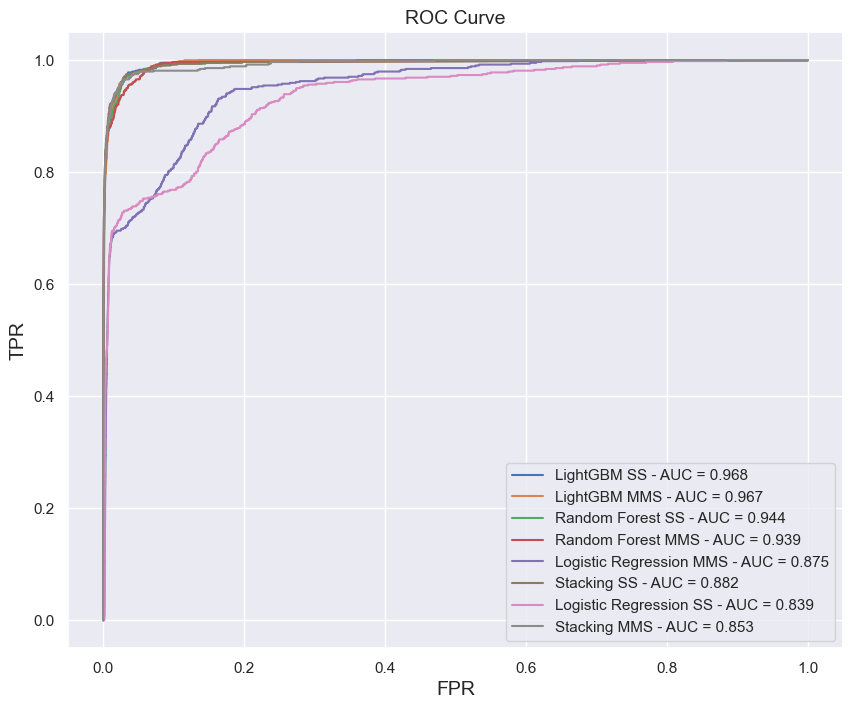

In [39]:
# Generating a prediction for LGBM on SS
ss_lgbm_proba = gs_ss_lgbm.predict_proba(X_test_ss)[:,1]
# Generating a prediction for LGBM on MMS
mms_lgbm_proba = gs_mms_lgbm.predict_proba(X_test_mms)[:,1]
# Generating a prediction for RF on SS
ss_rf_proba = gs_ss_rfc.predict_proba(X_test_ss)[:,1]
# Generating a prediction for RF on MMS
mms_rf_proba = gs_mms_rfc.predict_proba(X_test_mms)[:,1]
# Generating a prediction for LG on MMS
mms_lg_proba = gs_mms_lg.predict_proba(X_test_mms)[:,1]
# Generating a prediction for stacking on SS
stacking_ss_proba = stacking_ss.predict_proba(X_test_ss)[:,1]
# Generating a prediction for LG on SS
ss_lg_proba = gs_ss_lg.predict_proba(X_test_ss)[:,1]
# Generating a prediction for stacking on MMS
stacking_mms_proba = stacking_mms.predict_proba(X_test_mms)[:,1]

#-------------------------------------------------------------------------------------------------------

# Calculating scores for LGBM on SS
ss_lgbm_fpr, ss_lgbm_tpr, threshold = roc_curve(y_test, ss_lgbm_proba)
# Calculating scores for LGBM on MMS
mms_lgbm_fpr, mms_lgbm_tpr, threshold = roc_curve(y_test, mms_lgbm_proba)
# Calculating scores for RF on SS
ss_rf_fpr, ss_rf_tpr, threshold = roc_curve(y_test, ss_rf_proba)
# Calculating scores for RF on MMS
mms_rf_fpr, mms_rf_tpr, threshold = roc_curve(y_test, mms_rf_proba)
# Calculating scores for LG on MMS
mms_lg_fpr, mms_lg_tpr, threshold = roc_curve(y_test, mms_lg_proba)
# Calculating scores for stacking on SS
ss_stacking_fpr, ss_stacking_tpr, threshold = roc_curve(y_test, stacking_ss_proba)
# Calculating scores for LG on SS
ss_lg_fpr, ss_lg_tpr, threshold = roc_curve(y_test, ss_lg_proba)
# Calculating scores for stacking on MMS
mms_stacking_fpr, mms_stacking_tpr, threshold = roc_curve(y_test, stacking_mms_proba)

#-------------------------------------------------------------------------------------------------------

# Setting plot size
plt.figure(figsize=(10, 8), dpi=100)

#-------------------------------------------------------------------------------------------------------

# Plotting LGBM on SS
plt.plot(ss_lgbm_fpr, ss_lgbm_tpr, 
         label = f"LightGBM SS - AUC = {round(roc_auc_score(y_test, y_test_ss_lgbm_pred),3)}")
# Plotting LGBM on MMS
plt.plot(mms_lgbm_fpr, mms_lgbm_tpr, 
        label = f"LightGBM MMS - AUC = {round(roc_auc_score(y_test, y_test_mms_lgbm_pred),3)}")
# Plotting RF on SS
plt.plot(ss_rf_fpr, ss_rf_tpr, 
        label = f"Random Forest SS - AUC = {round(roc_auc_score(y_test, y_test_ss_rfc_pred),3)}")
# Plotting RF on MMS
plt.plot(mms_rf_fpr, mms_rf_tpr, 
        label = f"Random Forest MMS - AUC = {round(roc_auc_score(y_test, y_test_mms_rfc_pred),3)}")
# Plotting LG on MMS
plt.plot(mms_lg_fpr, mms_lg_tpr,
        label = f"Logistic Regression MMS - AUC = {round(roc_auc_score(y_test, y_test_mms_lg_pred),3)}")
# Plotting Stacking on SS
plt.plot(ss_stacking_fpr, ss_stacking_tpr,
        label = f"Stacking SS - AUC = {round(roc_auc_score(y_test, y_test_ss_stacking_pred),3)}")
# Plotting LG on SS
plt.plot(ss_lg_fpr, ss_lg_tpr,
        label = f"Logistic Regression SS - AUC = {round(roc_auc_score(y_test, y_test_ss_lg_pred),3)}")
# Plotting Stacking on MMS
plt.plot(mms_stacking_fpr, mms_stacking_tpr,
        label = f"Stacking MMS - AUC = {round(roc_auc_score(y_test, y_test_mms_stacking_pred),3)}")

#-------------------------------------------------------------------------------------------------------

# Display legend/Title
plt.legend()
plt.title('ROC Curve', fontsize=14)

#-------------------------------------------------------------------------------------------------------
#Define axis labels
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)

#-------------------------------------------------------------------------------------------------------

# Show plot
plt.show();

## Precision-Recall Curve

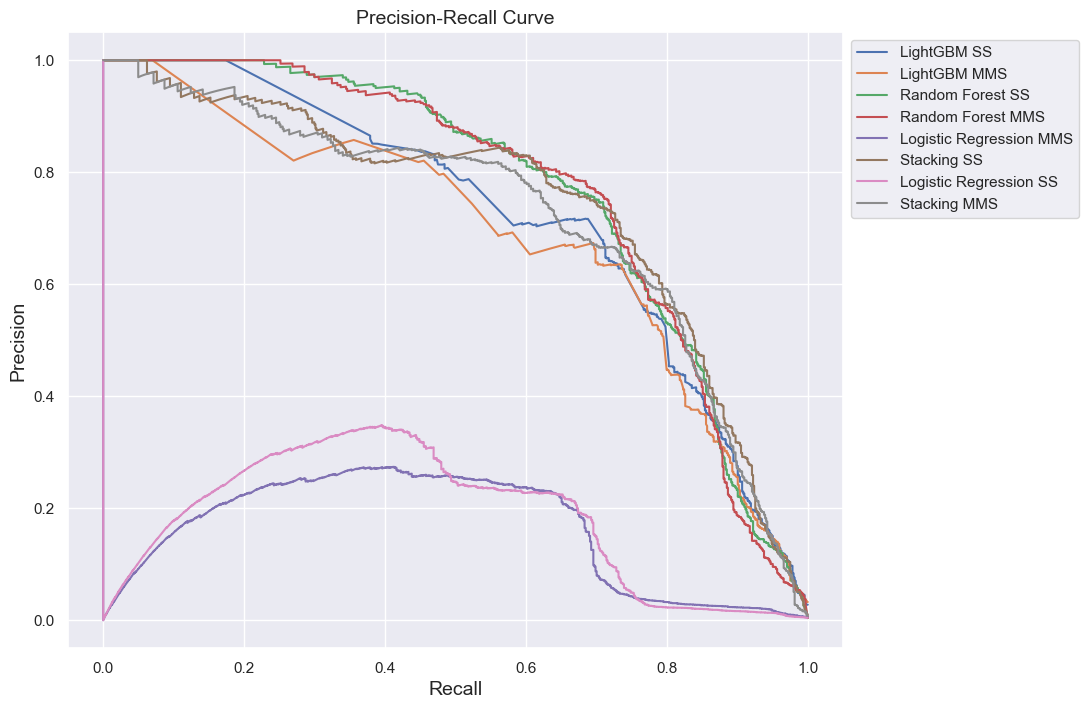

In [40]:
# Generating a prediction for LGBM on SS
ss_lgbm_proba = gs_ss_lgbm.predict_proba(X_test_ss)[:,1]
# Generating a prediction for LGBM on MMS
mms_lgbm_proba = gs_mms_lgbm.predict_proba(X_test_mms)[:,1]
# Generating a prediction for RF on SS
ss_rf_proba = gs_ss_rfc.predict_proba(X_test_ss)[:,1]
# Generating a prediction for RF on MMS
mms_rf_proba = gs_mms_rfc.predict_proba(X_test_mms)[:,1]
# Generating a prediction for LG on MMS
mms_lg_proba = gs_mms_lg.predict_proba(X_test_mms)[:,1]
# Generating a prediction for stacking on SS
stacking_ss_proba = stacking_ss.predict_proba(X_test_ss)[:,1]
# Generating a prediction for LG on SS
ss_lg_proba = gs_ss_lg.predict_proba(X_test_ss)[:,1]
# Generating a prediction for stacking on MMS
stacking_mms_proba = stacking_mms.predict_proba(X_test_mms)[:,1]

#-------------------------------------------------------------------------------------------------------

# Calculating scores for LGBM on SS
ss_lgbm_precision, ss_lgbm_recall, threshold = precision_recall_curve(y_test, ss_lgbm_proba)
# Calculating scores for LGBM on MMS
mms_lgbm_precision, mms_lgbm_recall, threshold = precision_recall_curve(y_test, mms_lgbm_proba)
# Calculating scores for RF on SS
ss_rf_precision, ss_rf_recall, threshold = precision_recall_curve(y_test, ss_rf_proba)
# Calculating scores for RF on MMS
mms_rf_precision, mms_rf_recall, threshold = precision_recall_curve(y_test, mms_rf_proba)
# Calculating scores for LG on MMS
mms_lg_precision, mms_lg_recall, threshold = precision_recall_curve(y_test, mms_lg_proba)
# Calculating scores for stacking on SS
ss_stacking_precision, ss_stacking_recall, threshold = precision_recall_curve(y_test,stacking_ss_proba)
# Calculating scores for LG on SS
ss_lg_precision, ss_lg_recall, threshold = precision_recall_curve(y_test, ss_lg_proba)
# Calculating scores for stacking on MMS
mms_stacking_precision,mms_stacking_recall,threshold=precision_recall_curve(y_test,stacking_mms_proba)

#-------------------------------------------------------------------------------------------------------

# Setting plot size
plt.figure(figsize=(10, 8), dpi=100)

#-------------------------------------------------------------------------------------------------------

# Plotting LGBM on SS
plt.plot(ss_lgbm_recall, ss_lgbm_precision, label = f"LightGBM SS")
# Plotting LGBM on MMS
plt.plot(mms_lgbm_recall, mms_lgbm_precision, label = f"LightGBM MMS")
# Plotting RF on SS
plt.plot(ss_rf_recall, ss_rf_precision, label = f"Random Forest SS")
# Plotting RF on MMS
plt.plot(mms_rf_recall, mms_rf_precision, label = f"Random Forest MMS")
# Plotting LG on MMS
plt.plot(mms_lg_recall, mms_lg_precision, label = f"Logistic Regression MMS")
# Plotting Stacking on SS
plt.plot(ss_stacking_recall, ss_stacking_precision, label = f"Stacking SS")
# Plotting LG on SS
plt.plot(ss_lg_recall, ss_lg_precision, label = f"Logistic Regression SS")
# Plotting Stacking on MMS
plt.plot(mms_stacking_recall, mms_stacking_precision, label = f"Stacking MMS")

#-------------------------------------------------------------------------------------------------------

# Display legend/Title
plt.legend(bbox_to_anchor=(1,1))
plt.title('Precision-Recall Curve', fontsize=14)

#-------------------------------------------------------------------------------------------------------
#Define axis labels
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)


#-------------------------------------------------------------------------------------------------------

# Show plot
plt.show();

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


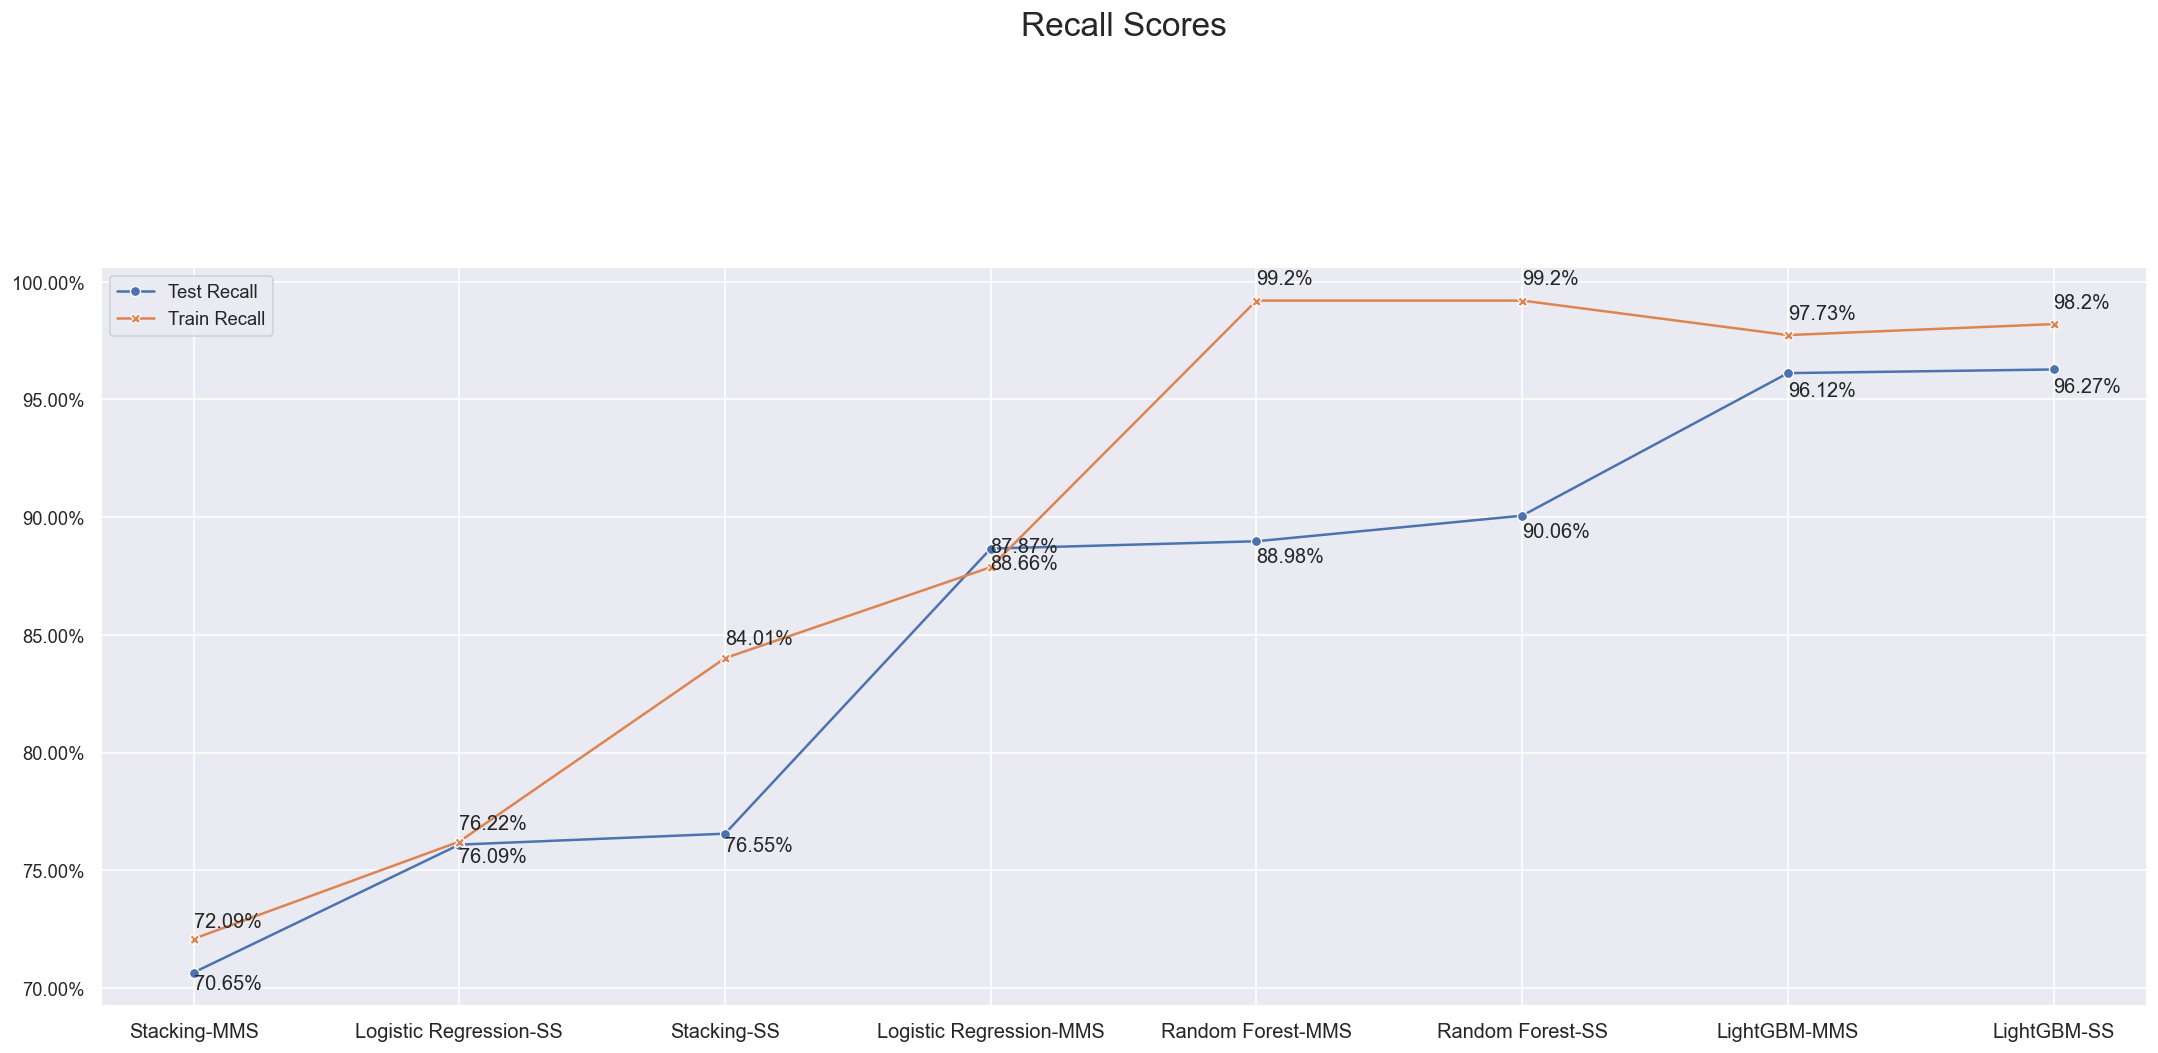

In [41]:
#Setting X and Y axis
test_recall_scores = [recall_score(y_test, y_test_mms_stacking_pred),
                      recall_score(y_test, y_test_ss_lg_pred),
                      recall_score(y_test, y_test_ss_stacking_pred),
                      recall_score(y_test, y_test_mms_lg_pred),
                      recall_score(y_test, y_test_mms_rfc_pred),
                      recall_score(y_test, y_test_ss_rfc_pred),
                      recall_score(y_test, y_test_mms_lgbm_pred),
                      recall_score(y_test, y_test_ss_lgbm_pred)]

train_recall_scores = [recall_score(y_train, y_train_mms_stacking_pred),
                      recall_score(y_train, y_train_ss_lg_pred),
                      recall_score(y_train, y_train_ss_stacking_pred),
                      recall_score(y_train, y_train_mms_lg_pred),
                      recall_score(y_train, y_train_mms_rfc_pred),
                      recall_score(y_train, y_train_ss_rfc_pred),
                      recall_score(y_train, y_train_mms_lgbm_pred),
                      recall_score(y_train, y_train_ss_lgbm_pred)]


index = ['Stacking-MMS', 'Logistic Regression-SS', 'Stacking-SS', 'Logistic Regression-MMS',
        'Random Forest-MMS', 'Random Forest-SS', 'LightGBM-MMS', 'LightGBM-SS']

#Setting size of chart
plt.figure(figsize=(22,8), dpi=120)

#Plotting chart
ax = sns.lineplot(x=index, y=test_recall_scores, marker='o', label='Test Recall')
ax1 = sns.lineplot(x=index, y=train_recall_scores, marker='X', label='Train Recall')

#Set Y axis labels
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_xticklabels(index, size=12)

#Adding values to charts
for indexes, scores in zip(index, test_recall_scores):
    ax.annotate(text=(str(round((scores*100),2)) + '%'), xy=(indexes, scores * 0.99))
    
for indexes, scores in zip(index, train_recall_scores):
    ax.annotate(text=(str(round((scores*100),2)) + '%'), xy=(indexes, scores * 1.007))


#Set title
plt.title('Recall Scores', fontsize=20, y=1.3)
    
#Show chart
plt.show();

# Section 3:Model Evaluation

## Confusion Matrix

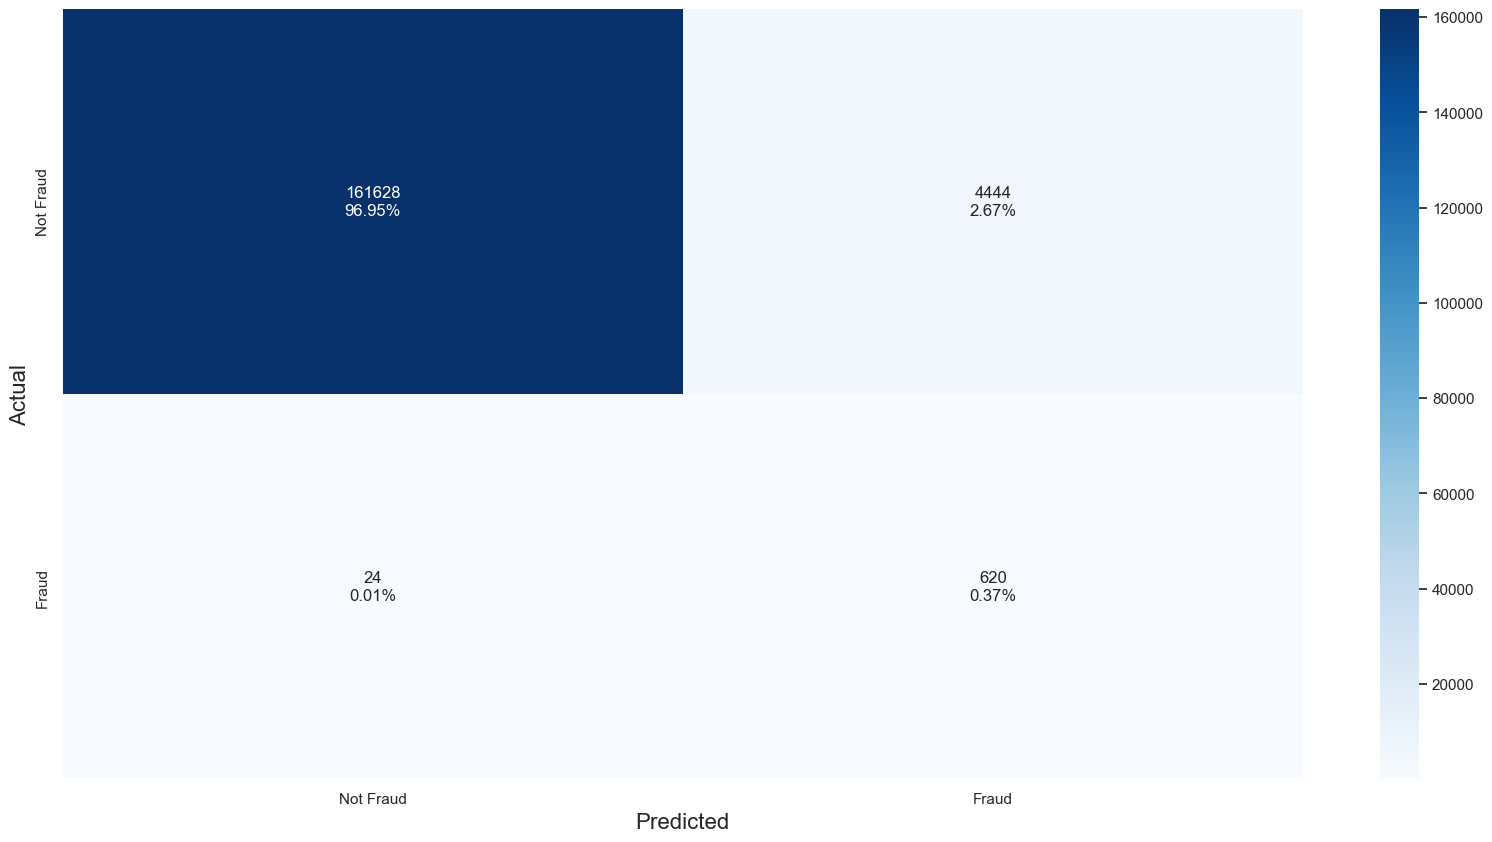

In [42]:
#Obtain confusion matrix
cf_matrix = confusion_matrix(y_test, y_test_ss_lgbm_pred)

#Creating labels
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.array(labels).reshape(2,2)

#Plot confusion matrix
ax = sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='')

#Setting axis
plt.ylabel('Actual', fontsize=16)
plt.xlabel("Predicted", fontsize=16)
ax.set_xticklabels(['Not Fraud', 'Fraud'])
ax.set_yticklabels(['Not Fraud', 'Fraud'])

#Set chart size
sns.set(rc={'figure.figsize':(20,10)})

#Show heatmap
plt.show()

## Feature Importance

In [43]:
pd.DataFrame(data=gs_ss_lgbm.best_estimator_.feature_importances_,
            index=X_test_ss.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
amt,4886
Hour_Night,760
category_misc pos,722
category_gas transport,681
category_home,630
category_food dining,578
category_travel,546
category_grocery pos,412
category_shopping net,384
category_shopping pos,327


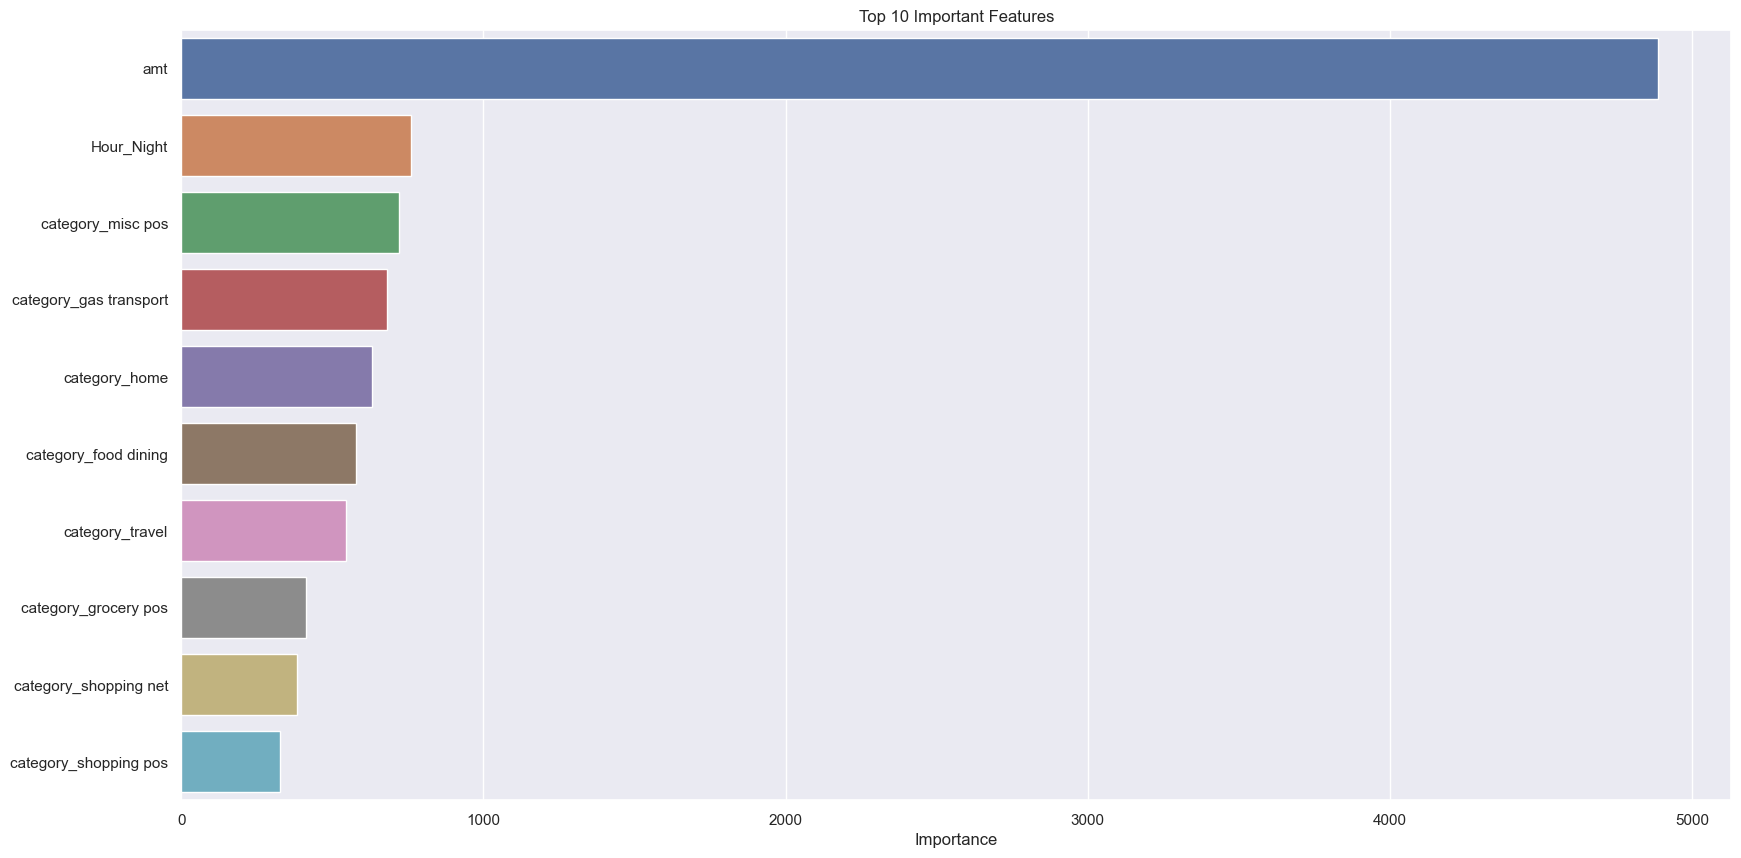

In [44]:
# Plotting
sns.barplot(data=pd.DataFrame(data=gs_ss_lgbm.best_estimator_.feature_importances_,index=X_test_ss.columns, columns=['Importance']).sort_values(by='Importance', ascending=False).head(10),
            x='Importance', 
            y = pd.DataFrame(data=gs_ss_lgbm.best_estimator_.feature_importances_,index=X_test_ss.columns, columns=['Importance']).sort_values(by='Importance', ascending=False).head(10).index)

#Setting Size of Chart
sns.set(rc={'figure.figsize':(4,4)})



#Set title
plt.title('Top 10 Important Features');
            

### Conclusion (So - Far):
<br>
1) The data set has 23 features and no missing values; this will aid in the swiftness of data cleaning.
<br>
<br>
2) In addition, I have noticed there are some columns, e.g., 'cc_num' and 'trans_num' that have no relevance to the target feature and will drop them.
<br>
<br>
3) The data is highly imbalanced, for every 1,000 credit card transactions, about 4 are fraud.
<br>
<br>
4) Thankfully there are no duplicate values.
<br>
<br>

## SHAP Values

In [45]:
x = 0.2

explainer = shap.Explainer(gs_ss_lgbm.predict, X_test_ss[:round(x * len(X_test_ss))])
shap_values = explainer(X_test_ss[:round(x * len(X_test_ss))])

Permutation explainer: 33344it [1:12:25,  7.66it/s]                           


In [46]:
joblib.dump(shap_values, './Data/Machine Learning Model/Shap/shap_values.pkl')

['./Data/Machine Learning Model/Shap/shap_values.pkl']

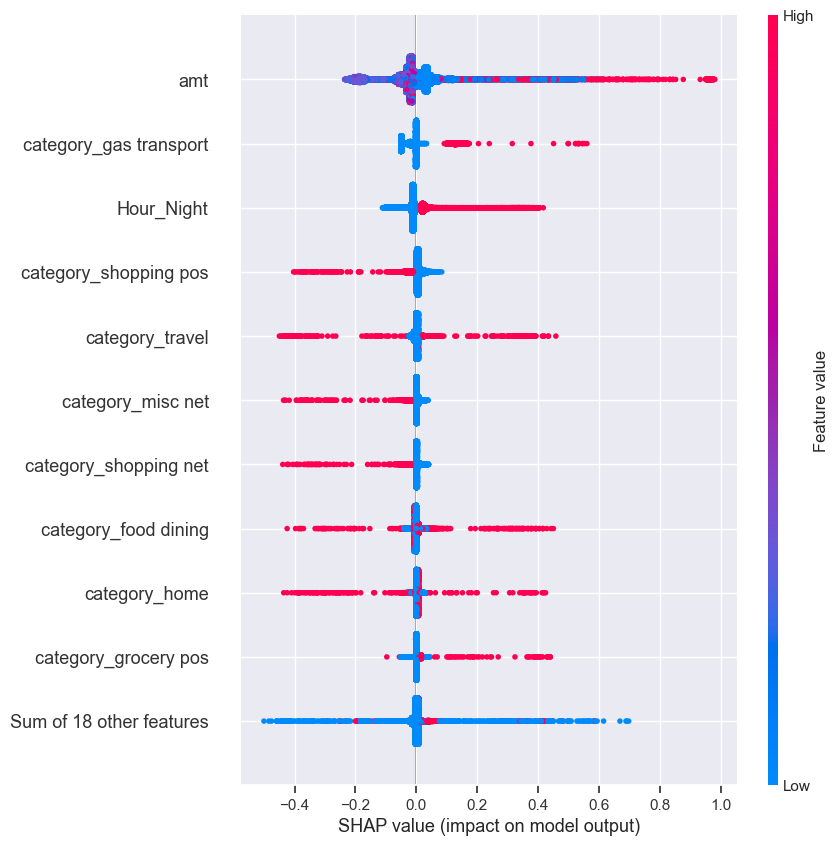

In [47]:
shap_values = joblib.load('./Data/Machine Learning Model/Shap/shap_values.pkl')
shap.plots.beeswarm(shap_values, max_display=11, plot_size=[8,10])